<a href="https://colab.research.google.com/github/avaramahmood/Robovitics-AniML-Blog/blob/main/KNN_Shikamaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest-Neighbours

## Fetching dataset from Github

In [3]:
!wget https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/knn_shogi_positions.csv

--2025-07-14 16:03:20--  https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/knn_shogi_positions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152235 (149K) [text/plain]
Saving to: ‘knn_shogi_positions.csv.1’

knn_shogi_positions 100%[===================>] 148.67K  --.-KB/s    in 0.03s   

2025-07-14 16:03:20 (4.31 MB/s) - ‘knn_shogi_positions.csv.1’ saved [152235/152235]



## Importing Dataset

In [4]:
import pandas as pd
df = pd.read_csv('knn_shogi_positions.csv')
X = df.drop(columns='move_label')
y = df['move_label']

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Training Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Testing Accuracy

In [7]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'k‑NN Test Accuracy: {accuracy:.2%}')

k‑NN Test Accuracy: 87.00%


## Visualization

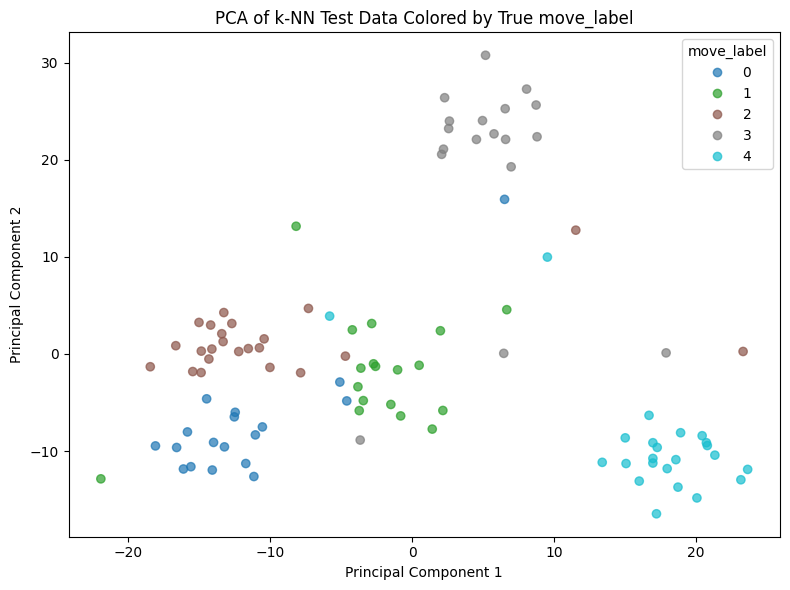

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Reduce test data to 2D
pca = PCA(n_components=2, random_state=42)
X_test_2d = pca.fit_transform(X_test)

#Plot clusters by true label
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_test_2d[:, 0], X_test_2d[:, 1],
    c=y_test, cmap='tab10', alpha=0.7
)
plt.title('PCA of k‑NN Test Data Colored by True move_label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(
    *scatter.legend_elements(),
    title="move_label",
    loc="best"
)
plt.tight_layout()
plt.show()